In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora/sample_submission.csv
/kaggle/input/quora/train.csv
/kaggle/input/quora/test.csv
/kaggle/input/qiqc-testset-processing/QIQC_TextProcessed_TestSet.csv
/kaggle/input/qiqc-testset-processing/TextProcessed_TestSet.csv
/kaggle/input/qiqc-testset-processing/__results__.html
/kaggle/input/qiqc-testset-processing/df_adv_Sincere.png
/kaggle/input/qiqc-testset-processing/__notebook__.ipynb
/kaggle/input/qiqc-testset-processing/df_adv_lemm_str.png
/kaggle/input/qiqc-testset-processing/__output__.json
/kaggle/input/qiqc-testset-processing/custom.css
/kaggle/input/qiqc-testset-processing/__results___files/__results___31_1.png
/kaggle/input/qiqc-testset-processing/__results___files/__results___30_1.png
/kaggle/input/qiqc-datacuration-trainingset/__results__.html
/kaggle/input/qiqc-datacuration-trainingset/df_adv_Sincere.png
/kaggle/input/qiqc-datacuration-trainingset/QIQC_TextProcessed_TrainingSet.csv
/kaggle/input/qiqc-datacuration-trainingset/df_trn_Insincere.png
/kaggle/input/

In [2]:
ls

__notebook__.ipynb


In [3]:
ls ../input

qiqc-datacuration-trainingset/  qiqc-testset-processing/  quora/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
import os

In [5]:
# Loading data for training set

train_df = pd.read_csv("/kaggle/input/qiqc-datacuration-trainingset/QIQC_TextProcessed_TrainingSet.csv")

In [6]:
# Loading data for test set
test_df = pd.read_csv("/kaggle/input/qiqc-testset-processing/QIQC_TextProcessed_TestSet.csv")

In [7]:
train_df.head(5)

,qid,nospaces,nostopwords,Tokenized_text,lemm_text,lemm_str,target,nostopwords_Tokenized_text,nostopwords_lemm_text,nostopwords_lemm_str
0,6f47b0f60633c2056455,how can reply to this comment india is poor it...,reply comment india poor fact understand unnec...,"['how', 'can', 'reply', 'to', 'this', 'comment...","['how', 'can', 'reply', 'to', 'this', 'comment...",how can reply to this comment india is poor it...,0,"['reply', 'comment', 'india', 'poor', 'fact', ...","['reply', 'comment', 'india', 'poor', 'fact', ...",reply comment india poor fact understand unnec...
1,d49b3966070b27bf07fc,what did they use for transportation in ancien...,use transportation ancient india,"['what', 'did', 'they', 'use', 'for', 'transpo...","['what', 'did', 'they', 'use', 'for', 'transpo...",what did they use for transportation in ancien...,0,"['use', 'transportation', 'ancient', 'india']","['use', 'transportation', 'ancient', 'india']",use transportation ancient india
2,6d5faa49380557c8ca7b,what are the most important provisions of obam...,important provisions obamacare,"['what', 'are', 'the', 'most', 'important', 'p...","['what', 'are', 'the', 'most', 'important', 'p...",what are the most important provision of obama...,0,"['important', 'provisions', 'obamacare']","['important', 'provision', 'obamacare']",important provision obamacare
3,cebea75faa47388edcf5,at what age do most finns master english today,age finns master english today,"['at', 'what', 'age', 'do', 'most', 'finns', '...","['at', 'what', 'age', 'do', 'most', 'finn', 'm...",at what age do most finn master english today,0,"['age', 'finns', 'master', 'english', 'today']","['age', 'finn', 'master', 'english', 'today']",age finn master english today
4,2a7b76a679cadb0a016e,what is cheapest place to live in india for on...,cheapest place live india one month best suits...,"['what', 'is', 'cheapest', 'place', 'to', 'liv...","['what', 'is', 'cheapest', 'place', 'to', 'liv...",what is cheapest place to live in india for on...,0,"['cheapest', 'place', 'live', 'india', 'one', ...","['cheapest', 'place', 'live', 'india', 'one', ...",cheapest place live india one month best suit ...


In [8]:
test_df.head(5)

,qid,nospaces,nostopwords,Tokenized_text,lemm_text,lemm_str,nostopwords_Tokenized_text,nostopwords_lemm_text,nostopwords_lemm_str
0,f56a9a31974dc66186e8,is it good idea to go through phlebotomy class...,good idea go phlebotomy class going nursing sc...,"['is', 'it', 'good', 'idea', 'to', 'go', 'thro...","['is', 'it', 'good', 'idea', 'to', 'go', 'thro...",is it good idea to go through phlebotomy class...,"['good', 'idea', 'go', 'phlebotomy', 'class', ...","['good', 'idea', 'go', 'phlebotomy', 'class', ...",good idea go phlebotomy class going nursing sc...
1,d957c3758060f45da303,how can fix lead into camlin compass to draw a...,fix lead camlin compass draw arcs circles engi...,"['how', 'can', 'fix', 'lead', 'into', 'camlin'...","['how', 'can', 'fix', 'lead', 'into', 'camlin'...",how can fix lead into camlin compass to draw a...,"['fix', 'lead', 'camlin', 'compass', 'draw', '...","['fix', 'lead', 'camlin', 'compass', 'draw', '...",fix lead camlin compass draw arc circle engine...
2,ad822d5abaedb9e247b9,how many animes are there in world,many animes world,"['how', 'many', 'animes', 'are', 'there', 'in'...","['how', 'many', 'anime', 'are', 'there', 'in',...",how many anime are there in world,"['many', 'animes', 'world']","['many', 'anime', 'world']",many anime world
3,4e979c23eeb6a4bd1f2e,how do tell my family cut,tell family cut,"['how', 'do', 'tell', 'my', 'family', 'cut']","['how', 'do', 'tell', 'my', 'family', 'cut']",how do tell my family cut,"['tell', 'family', 'cut']","['tell', 'family', 'cut']",tell family cut
4,333cc031262566b8da49,how do save down my bitcoin image address from...,save bitcoin image address coinbase,"['how', 'do', 'save', 'down', 'my', 'bitcoin',...","['how', 'do', 'save', 'down', 'my', 'bitcoin',...",how do save down my bitcoin image address from...,"['save', 'bitcoin', 'image', 'address', 'coinb...","['save', 'bitcoin', 'image', 'address', 'coinb...",save bitcoin image address coinbase


In [9]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(train_df["nostopwords_lemm_text"])
corpus[:5]

["['reply',", "'comment',", "'india',", "'poor',", "'fact',"]

In [10]:
corpus

["['reply',",
 "'comment',",
 "'india',",
 "'poor',",
 "'fact',",
 "'understand',",
 "'unnecessary',",
 "'criticism',",
 "'snapchat',",
 "'ceo',",
 "'statement']",
 "['use',",
 "'transportation',",
 "'ancient',",
 "'india']",
 "['important',",
 "'provision',",
 "'obamacare']",
 "['age',",
 "'finn',",
 "'master',",
 "'english',",
 "'today']",
 "['cheapest',",
 "'place',",
 "'live',",
 "'india',",
 "'one',",
 "'month',",
 "'best',",
 "'suit',",
 "'tourism',",
 "'also']",
 "['bubble',",
 "'coming',",
 "'lake']",
 "['living',",
 "'life',",
 "'philosophy',",
 "'another',",
 "'way',",
 "'living',",
 "'lie',",
 "'shortest',",
 "'root',",
 "'isolation']",
 "['girl',",
 "'become',",
 "'escort',",
 "'sex',",
 "'worker']",
 "['tall',",
 "'kay',",
 "'aull']",
 "['largest',",
 "'life',",
 "'form',",
 "'exoskeleton']",
 "['happens',",
 "'amniotic',",
 "'fluid',",
 "'enters',",
 "'bloodstream']",
 "['movie',",
 "'desperately',",
 "'need',",
 "'better',",
 "'ending',",
 "'would',",
 "'end',",
 "'charg

In [11]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{"['best',": 28701,
 "'get',": 24520,
 "'like',": 23044,
 "'people',": 21057,
 "'would',": 19186,
 "['would',": 17848,
 "'one',": 14411,
 "'make',": 13356,
 "['get',": 13354,
 "'good',": 13268}

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Unigram Analysis**

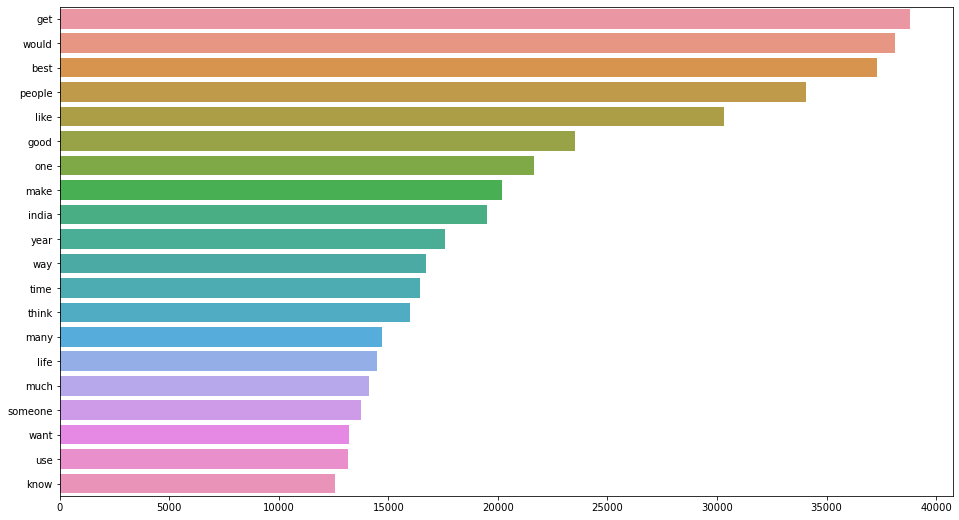

In [13]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(train_df["nostopwords_lemm_text"],20,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

**Bigram Analysis**

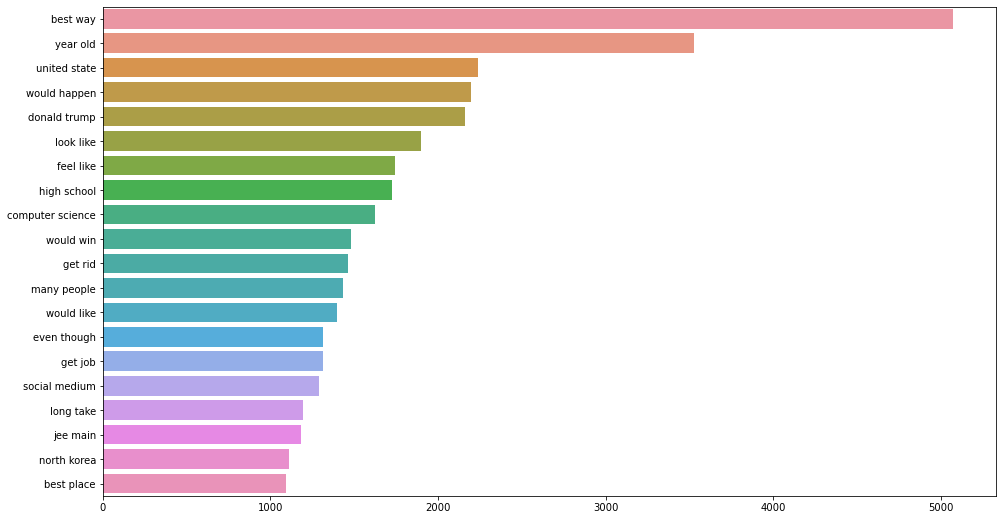

In [14]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(train_df["nostopwords_lemm_text"],20,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

**Trigram Analysis**

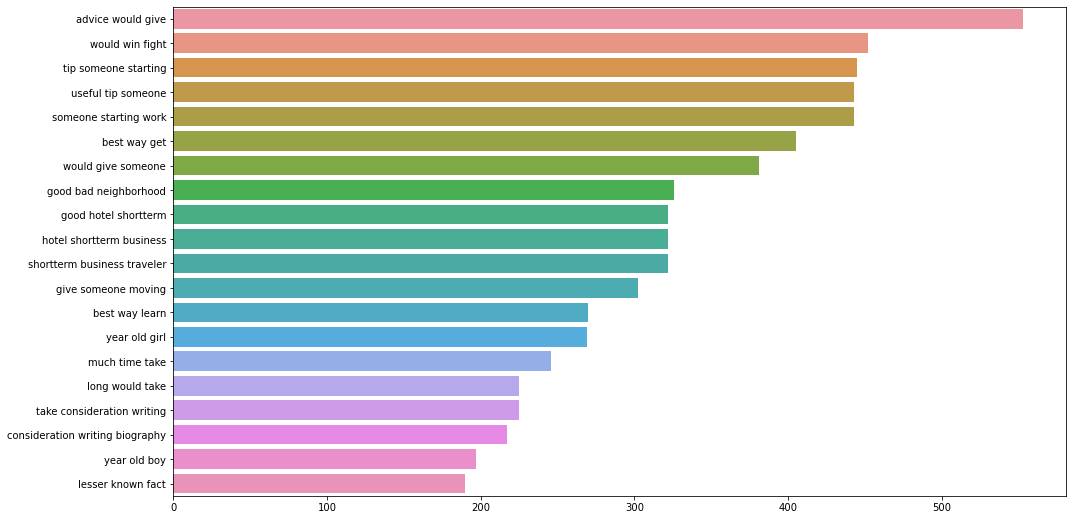

In [15]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(train_df["nostopwords_lemm_text"],20,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))